# Clustering and visualization for gene analysis

In [ ]:
import tarfile
import numpy as np
import io
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tar = tarfile.open('release_gene_analysis_data.tar.gz', 'r:gz')
member = tar.getmember('data/p1/X.npy')
f = tar.extractfile(member)
X = np.load(io.BytesIO(f.read()))

member = tar.getmember('data/p1/y.npy')
f = tar.extractfile(member)
Y = np.load(io.BytesIO(f.read()))

tar.close()

In [ ]:
print(X.shape)
np.max(X[:,0])

(511, 45768)


11.941397591320595

In [ ]:
# log transform
X_log = np.log2(X + 1)
print(X_log.shape)
np.max(X_log[:,0])

(511, 45768)


3.6939215228197613

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def apply_pca(X):
    pca = PCA()
    z = pca.fit_transform(X)
    return z, pca

def scatter_plot_first2_pc(Z, title, xlabel, ylabel, labels = None):
    plt.scatter(Z[:,0],Z[:,1], c=labels)
    plt.title(title,size=18)
    plt.xlabel(xlabel,size=14)
    plt.ylabel(ylabel,size=14)
    plt.axis("equal")
    plt.show()

def general_plot(X, Y, title, xlabel, ylabel):
    plt.plot(X, Y)
    plt.title(title,size=18)
    plt.xlabel(xlabel,size=14)
    plt.ylabel(ylabel,size=14)
    plt.show()

#### Test data without log

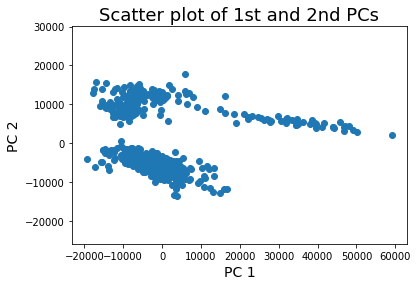

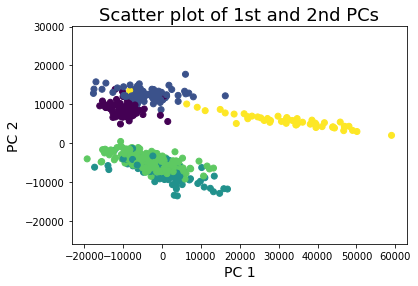

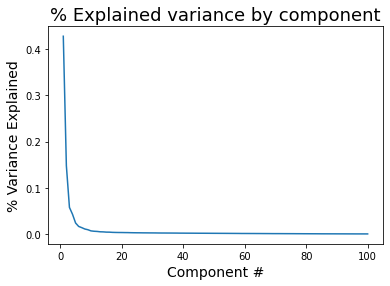

NameError: name 'pca_log' is not defined

In [ ]:
z, pca = apply_pca(X)
scatter_plot_first2_pc(z, "Scatter plot of 1st and 2nd PCs", "PC 1", "PC 2")
scatter_plot_first2_pc(z, "Scatter plot of 1st and 2nd PCs", "PC 1", "PC 2", labels=Y)
# explained variance
general_plot(
    np.arange(1,101), pca.explained_variance_ratio_[0:100],
    "% Explained variance by component", "Component #", "% Variance Explained"
)

# explained variance cum
general_plot(
    np.arange(0,511),np.cumsum(pca_log.explained_variance_ratio_[0:511]),
    "Cumulative Variance Explained", "Number of Components", "% Variance Explained"
)

In [ ]:
# Explained variance first PC
print(pca.explained_variance_ratio_[0])

# Until which components the 85% of variance is represented
print(np.where(np.cumsum(pca.explained_variance_ratio_) >=.85)[0][0])

0.42779670983572654
35


#### Test with log trans

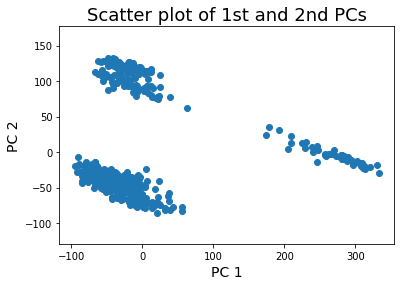

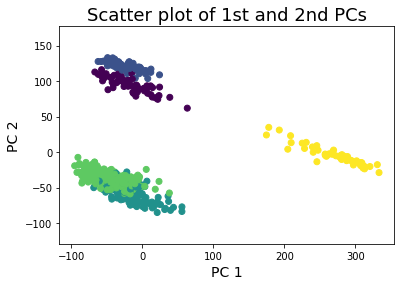

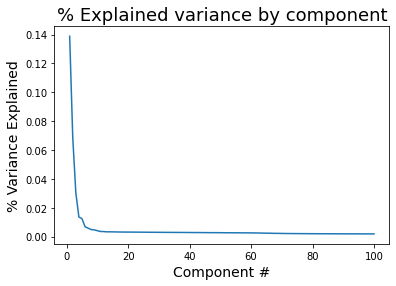

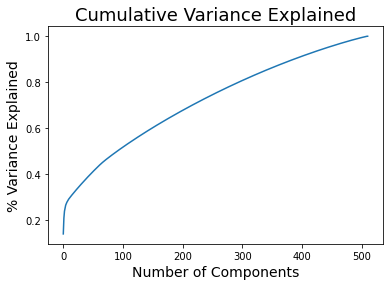

In [ ]:
z_log, pca_log = apply_pca(X_log)
scatter_plot_first2_pc(z_log, "Scatter plot of 1st and 2nd PCs", "PC 1", "PC 2")
scatter_plot_first2_pc(z_log, "Scatter plot of 1st and 2nd PCs", "PC 1", "PC 2", labels=Y)

# explained variance
general_plot(
    np.arange(1,101), pca_log.explained_variance_ratio_[0:100],
    "% Explained variance by component", "Component #", "% Variance Explained"
)

# explained variance cum
general_plot(
    np.arange(0,511),np.cumsum(pca_log.explained_variance_ratio_[0:511]),
    "Cumulative Variance Explained", "Number of Components", "% Variance Explained"
)

In [ ]:
# Explained variance first PC
pca_log.explained_variance_ratio_[0]

# Until which components the 85% of variance is represented
print(np.where(np.cumsum(pca_log.explained_variance_ratio_) >=.85)[0][0])

338


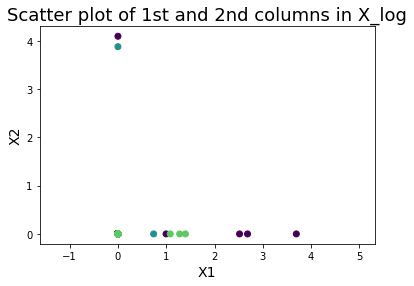

In [ ]:
plt.scatter(X_log[:,0],X_log[:,1], c=Y)
plt.title("Scatter plot of 1st and 2nd columns in X_log",size=18)
plt.xlabel("X1",size=14)
plt.ylabel("X2",size=14)
plt.axis("equal")
plt.show()

## MDS

In [ ]:
from sklearn.manifold import MDS

In [ ]:
# MDS can be slow when n is large
mds = MDS(n_components=2,verbose=1,eps=1e-4, n_init=10)
mds.fit(X_log)

MDS(eps=0.0001, n_init=10, verbose=1)

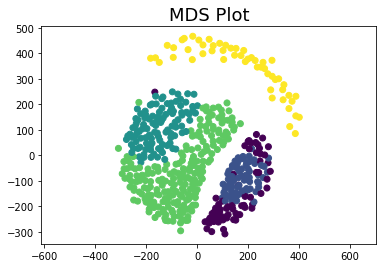

In [ ]:
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=Y)
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()

In [ ]:
mds.embedding_

array([[ 200.55856621,  -53.21478791],
       [ 161.50087546,   -9.07410402],
       [ 214.46107647,   26.15602659],
       ...,
       [ 118.98565958,   84.4034495 ],
       [-202.99040188,  -98.53374926],
       [-165.01262758, -243.60660242]])

## TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
pca = PCA(50)
z_log = pca.fit_transform(X_log)

In [ ]:
tsne = TSNE(n_components=2,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(z_log)

C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 511 samples in 0.001s...
[t-SNE] Computed neighbors for 511 samples in 0.086s...
[t-SNE] Computed conditional probabilities for sample 511 / 511
[t-SNE] Mean sigma: 38.050280
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.780830
[t-SNE] KL divergence after 1000 iterations: 0.392089


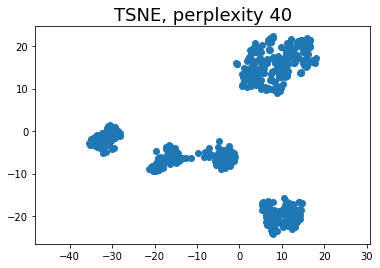

In [ ]:
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE, perplexity 40",size=18)
plt.axis("equal")
plt.show()

## Kmeans after pca reduction

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5,n_init=10)
y = kmeans.fit_predict(z_log)

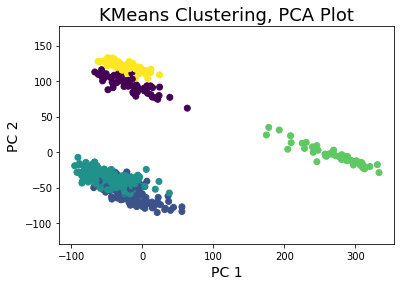

In [ ]:
plt.scatter(z_log[:,0],z_log[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

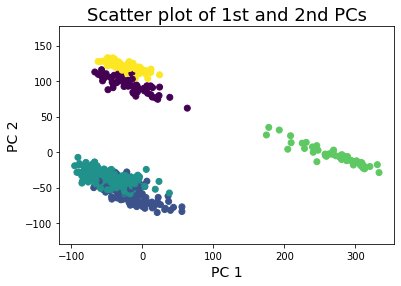

In [ ]:
scatter_plot_first2_pc(z_log, "Scatter plot of 1st and 2nd PCs", "PC 1", "PC 2", labels=y)

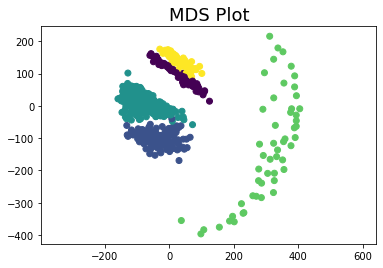

In [ ]:
mds = MDS(n_components=2,verbose=1,eps=1e-4, n_init=10)
mds.fit(z_log)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=y)
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()

In [ ]:
tsne = TSNE(n_components=2,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(z_log)

C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 511 samples in 0.001s...
[t-SNE] Computed neighbors for 511 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 511 / 511
[t-SNE] Mean sigma: 38.050280
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.539658
[t-SNE] KL divergence after 1000 iterations: 0.437452


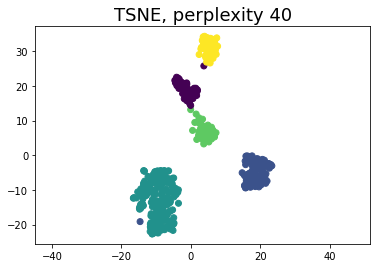

In [ ]:
plt.scatter(z_tsne[:,0],z_tsne[:,1], c=y)
plt.title("TSNE, perplexity 40",size=18)
plt.axis("equal")
plt.show()

## Elbow

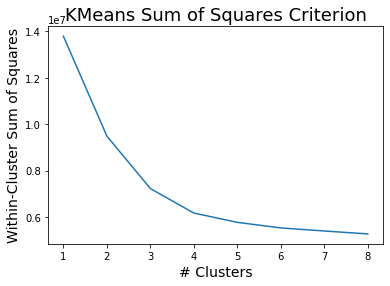

In [ ]:
all_kmeans = [KMeans(n_clusters=i+1,n_init=10) for i in range(8)]
# i-th kmeans fits i+1 clusters
for i in range(8):
    all_kmeans[i].fit(z_log)

inertias = [all_kmeans[i].inertia_ for i in range(8)]
plt.plot(np.arange(1,9),inertias)
plt.title("KMeans Sum of Squares Criterion",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Within-Cluster Sum of Squares",size=14)
plt.show()

In [ ]:
all_kmeans[4].inertia_

5767637.938193812

## Kmeans without PCA

In [ ]:
kmeans = KMeans(n_clusters=5,n_init=10)
y = kmeans.fit_predict(X_log)

In [ ]:
y.shape

(511,)

In [ ]:
# Without PCA
means2 = np.array([np.mean(X_log[np.where(y==i)[0]],0) for i in range(5)])

In [ ]:
means2.shape

(5, 45768)

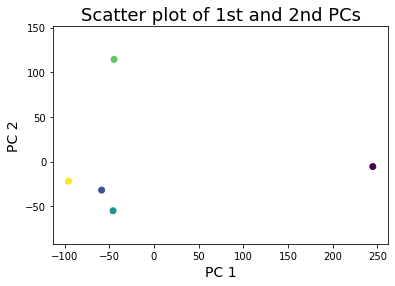

In [ ]:
z_log, pca_log = apply_pca(means2)
scatter_plot_first2_pc(z_log, "Scatter plot of 1st and 2nd PCs", "PC 1", "PC 2", labels=[i for i in range(5)])

breaking at iteration 39 with stress 3875.5345446925685
breaking at iteration 100 with stress 3876.120094529898
breaking at iteration 33 with stress 9474.874133910223
breaking at iteration 47 with stress 3876.0582803050656
breaking at iteration 52 with stress 3876.0892249565422
breaking at iteration 41 with stress 3875.5475256702443
breaking at iteration 46 with stress 3875.5306854708674
breaking at iteration 51 with stress 9474.340792051686
breaking at iteration 132 with stress 3876.1380645627287
breaking at iteration 42 with stress 3876.204726349894


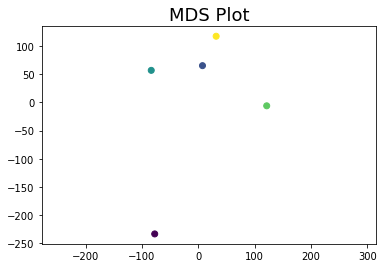

In [ ]:
mds_means = MDS(n_components=2,verbose=1,eps=1e-4, n_init=10)
mds_means.fit(means2)

plt.scatter(mds_means.embedding_[:,0],mds_means.embedding_[:,1],c=[i for i in range(5)])
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()

In [ ]:
tsne = TSNE(n_components=2)
z_tsne = tsne.fit_transform(means2)

C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


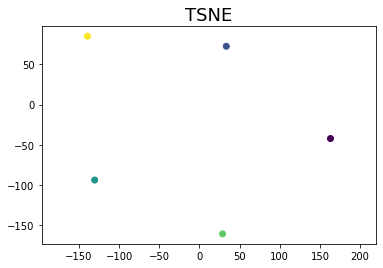

In [ ]:
plt.scatter(z_tsne[:,0],z_tsne[:,1], c=[i for i in range(5)])
plt.title("TSNE",size=18)
plt.axis("equal")
plt.show()

# Written report

## Problem 5

### Part1, 1

In [ ]:
tar = tarfile.open('release_gene_analysis_data.tar.gz', 'r:gz')
member = tar.getmember('data/p2_unsupervised/X.npy')
f = tar.extractfile(member)
X = np.load(io.BytesIO(f.read()))

tar.close()

In [ ]:
# log transform
X_log = np.log2(X + 1)
print(X_log.shape)
np.max(X_log[:,0])

(2169, 45768)


5.972169178513185

In [ ]:
pca = PCA()
z_log = pca.fit_transform(X_log)

In [ ]:
np.where(np.cumsum(pca.explained_variance_ratio_) >=.85)[0][0]

1252

In [ ]:
pca = PCA(1252)
z_log = pca.fit_transform(X_log)

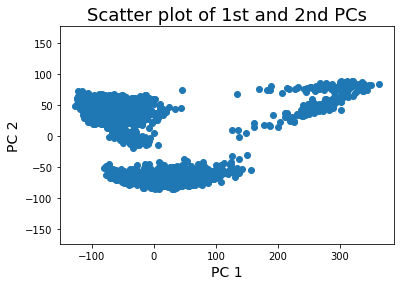

In [ ]:
scatter_plot_first2_pc(z_log, "Scatter plot of 1st and 2nd PCs", "PC 1", "PC 2")

In [ ]:
# mds = MDS(n_components=2,verbose=1,eps=1e-4, n_init=10)
# mds.fit(z_log)
# plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1])
# plt.title("MDS Plot",size=18)
# plt.axis("equal")
# plt.show()

C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.011s...
[t-SNE] Computed neighbors for 2169 samples in 0.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 45.399461
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.011299
[t-SNE] KL divergence after 1000 iterations: 1.540314


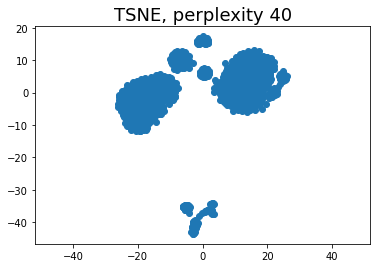

In [ ]:
tsne = TSNE(n_components=2,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(z_log)
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE, perplexity 40",size=18)
plt.axis("equal")
plt.show()

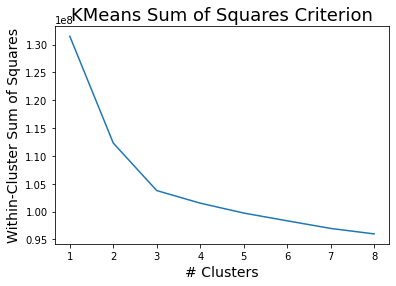

In [ ]:
all_kmeans = [KMeans(n_clusters=i+1,n_init=50) for i in range(8)]
# i-th kmeans fits i+1 clusters
for i in range(8):
    all_kmeans[i].fit(z_log)

inertias = [all_kmeans[i].inertia_ for i in range(8)]
plt.plot(np.arange(1,9),inertias)
plt.title("KMeans Sum of Squares Criterion",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Within-Cluster Sum of Squares",size=14)
plt.show()

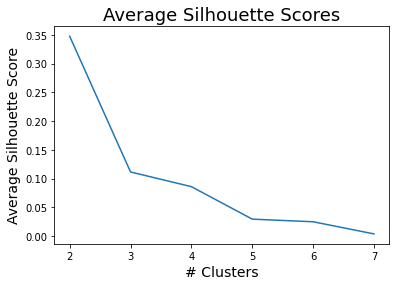

In [ ]:
from sklearn.metrics import silhouette_score
plt.plot(np.arange(2,8),[silhouette_score(z_log,KMeans(i,n_init=50).fit(z_log).labels_) for i in range(2,8)])
plt.title("Average Silhouette Scores",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Average Silhouette Score",size=14)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3,n_init=10)
y = kmeans.fit_predict(z_log)

In [ ]:
y

array([1, 1, 1, ..., 2, 2, 2])

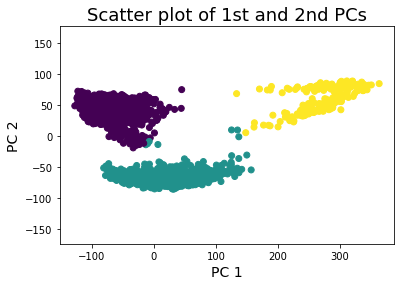

In [ ]:
scatter_plot_first2_pc(z_log, "Scatter plot of 1st and 2nd PCs", "PC 1", "PC 2", y)

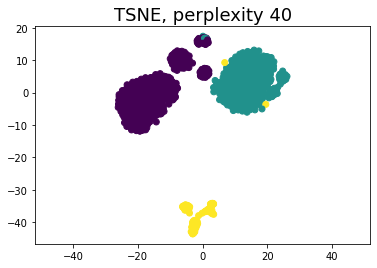

In [ ]:
plt.scatter(z_tsne[:,0],z_tsne[:,1], c=y)
plt.title("TSNE, perplexity 40",size=18)
plt.axis("equal")
plt.show()

### Part1, 2

In [ ]:
kmeans = KMeans(n_clusters=6,n_init=100)
y = kmeans.fit_predict(z_log)

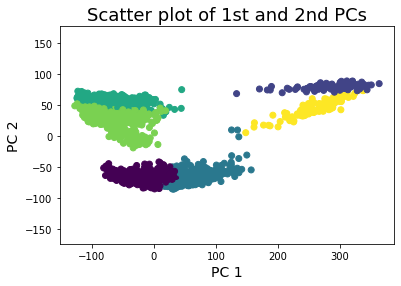

In [ ]:
scatter_plot_first2_pc(z_log, "Scatter plot of 1st and 2nd PCs", "PC 1", "PC 2", y)

In [ ]:
means3 = np.array([np.mean(z_log[np.where(y==i)[0]],0) for i in range(6)])

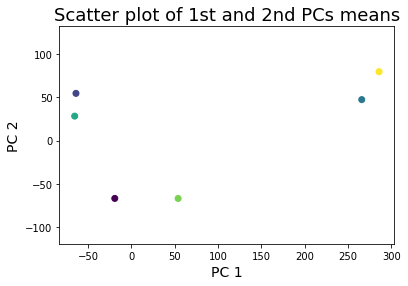

In [ ]:
scatter_plot_first2_pc(means3, "Scatter plot of 1st and 2nd PCs means", "PC 1", "PC 2", [i for i in range(6)])

### Part2, 2

In [ ]:
# kmeans = KMeans(n_clusters=6,n_init=10)
# y = kmeans.fit_predict(z_log)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


In [ ]:
np.random.seed(317)
perm = np.random.permutation(X_log.shape[0])
n_train = int(4/5*X_log.shape[0])
print(n_train)
X_train = X_log[perm[:n_train]]
y_train = y[perm[:n_train]]
X_test = X_log[perm[n_train:]]
y_test = y[perm[n_train:]]

1735


In [ ]:
# Some solvers only support certain regularization/multi_class parameters
log_reg = LogisticRegressionCV(cv=5,Cs=[0.01,0.1,1,10],max_iter=5000,penalty="l1",solver="liblinear",multi_class="ovr")
log_reg.fit(X_train,y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], cv=5, max_iter=5000,
                     multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
log_reg.score(X_train,y_train)

0.9988472622478386

In [ ]:
# y_pred = log_reg.predict(X_train)

In [ ]:
log_reg.C_

array([10.  ,  0.01,  1.  ,  0.01,  0.01,  1.  ])

In [ ]:
log_reg.scores_

{0: array([[0.95100865, 0.96253602, 0.96541787, 0.96829971],
        [0.95677233, 0.97694524, 0.96541787, 0.97118156],
        [0.94524496, 0.96541787, 0.95677233, 0.96829971],
        [0.93083573, 0.95100865, 0.95965418, 0.96541787],
        [0.95677233, 0.9740634 , 0.97118156, 0.96541787]]),
 1: array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 2: array([[0.93659942, 0.97118156, 0.9740634 , 0.96541787],
        [0.94236311, 0.97982709, 0.97694524, 0.96829971],
        [0.93659942, 0.96253602, 0.95965418, 0.95965418],
        [0.94524496, 0.95677233, 0.95965418, 0.96253602],
        [0.94524496, 0.96541787, 0.97694524, 0.98270893]]),
 3: array([[1.        , 1.        , 1.        , 1.        ],
        [0.99711816, 1.        , 1.        , 0.99711816],
        [0.99711816, 0.99423631, 0.99423631, 0.99423631],
        [0.99711816, 0.99711816, 0.99711816, 0.99711816],
        [1.        , 1.        , 1.     

In [ ]:
log_reg.score(X_test,y_test)

0.9769585253456221

In [ ]:
log_reg.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
coeficients = np.sum(np.abs(log_reg.coef_),axis=0)

In [ ]:
top = 100
best_features = np.argsort(-coeficients)[:top]
best_features

array([ 4356, 36985,  8196, 31647,  8586, 23426, 25006, 43066, 40741,
       35059, 35128, 40650, 39631, 41558, 38837, 34624,  8663, 38286,
       25434,  7885, 25444, 37616, 31892,  4881, 40273,  4855, 39051,
       41154, 42912, 36788,  2326, 39607, 40633, 23682, 45675, 41790,
       44940, 32362, 38806, 43511, 31893, 40744, 40981,  5390, 45650,
        5341, 40797,  6963, 31419,  3455, 43283, 38149, 33783,  4780,
       38846, 32262,  5940,  3936, 42410, 36784, 38850, 41677, 34572,
       40030, 43478, 24589, 41899, 43806,  5809, 45458, 38255, 39692,
       36986, 44094, 23677, 32023, 37085, 43313,  8501,  5526, 40786,
        5586, 25724,  7059, 41535,  8632,  1730, 37570, 25283,   883,
       38505,  6008,  3320, 34340,  4946, 42527,  2787, 38467, 25368,
       39027], dtype=int64)

In [ ]:
# np.array([test[i] for i in best_features])

In [ ]:
X_train[:,np.array([0,12])]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
tar = tarfile.open('release_gene_analysis_data.tar.gz', 'r:gz')
member = tar.getmember('data/p2_evaluation/X_train.npy')
f = tar.extractfile(member)
X_train = np.load(io.BytesIO(f.read()))

member = tar.getmember('data/p2_evaluation/X_test.npy')
f = tar.extractfile(member)
X_test = np.load(io.BytesIO(f.read()))

member = tar.getmember('data/p2_evaluation/y_train.npy')
f = tar.extractfile(member)
y_train = np.load(io.BytesIO(f.read()))

member = tar.getmember('data/p2_evaluation/y_test.npy')
f = tar.extractfile(member)
y_test = np.load(io.BytesIO(f.read()))

tar.close()

In [ ]:
# log transform
X_train = np.log2(X_train + 1)
X_test = np.log2(X_test + 1)

### Best features

In [ ]:
# Filter
X_train_b_features = X_train[:,best_features]
X_test_b_features = X_test[:,best_features]

In [ ]:
log_reg = LogisticRegressionCV(cv=5,Cs=[0.01,0.1,1,10],max_iter=5000,penalty="l1",solver="liblinear",multi_class="ovr")
log_reg.fit(X_train_b_features,y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], cv=5, max_iter=5000,
                     multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
log_reg.score(X_test_b_features,y_test)

0.8212996389891697

### random features

In [ ]:
rand_num = np.random.randint(len(coeficients), size=(100))

In [ ]:
# Filter
X_train_filter = X_train[:,rand_num]
X_test_filter = X_test[:,rand_num]

In [ ]:
log_reg = LogisticRegressionCV(cv=5,Cs=[0.01,0.1,1,10],max_iter=5000,penalty="l1",solver="liblinear",multi_class="ovr")
log_reg.fit(X_train_filter,y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], cv=5, max_iter=5000,
                     multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
log_reg.score(X_test_filter,y_test)

0.42418772563176893

### Highest variance

In [ ]:
variance_num = np.var(X_train, axis=0)

In [ ]:
top = 100
highest_var_features = np.argsort(-variance_num)[:top]

In [ ]:
# Filter
X_train_h_variance = X_train[:,highest_var_features]
X_test_h_variance = X_test[:,highest_var_features]

In [ ]:
log_reg = LogisticRegressionCV(cv=5,Cs=[0.01,0.1,1,10],max_iter=5000,penalty="l1",solver="liblinear",multi_class="ovr")
log_reg.fit(X_train_h_variance,y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], cv=5, max_iter=5000,
                     multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
log_reg.score(X_test_h_variance,y_test)

0.9160649819494585

In [ ]:
bf_variances = np.var(X_test_b_features, axis=0)
h_variances = np.var(X_test_h_variance, axis=0)

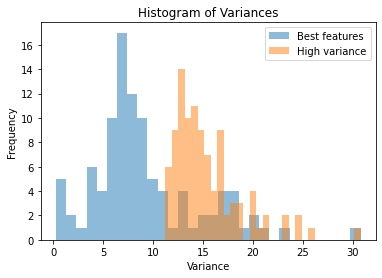

In [ ]:
# Create a histogram
# plt.hist(variances, bins=20)
plt.hist(bf_variances, bins=30, alpha=0.5, label='Best features')
plt.hist(h_variances, bins=30, alpha=0.5, label='High variance')

# Add labels and title
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Histogram of Variances')
plt.legend(loc='upper right')

# Display the plot
plt.show()

## Problem 6

In [ ]:
tar = tarfile.open('release_gene_analysis_data.tar.gz', 'r:gz')
member = tar.getmember('data/p1/X.npy')
f = tar.extractfile(member)
X = np.load(io.BytesIO(f.read()))

member = tar.getmember('data/p1/y.npy')
f = tar.extractfile(member)
Y = np.load(io.BytesIO(f.read()))

tar.close()

In [ ]:
print(X.shape)
np.max(X[:,0])

(511, 45768)


11.941397591320595

In [ ]:
# log transform
X_log = np.log2(X + 1)
print(X_log.shape)
np.max(X_log[:,0])

(511, 45768)


3.6939215228197613

In [ ]:
from sklearn.manifold import TSNE

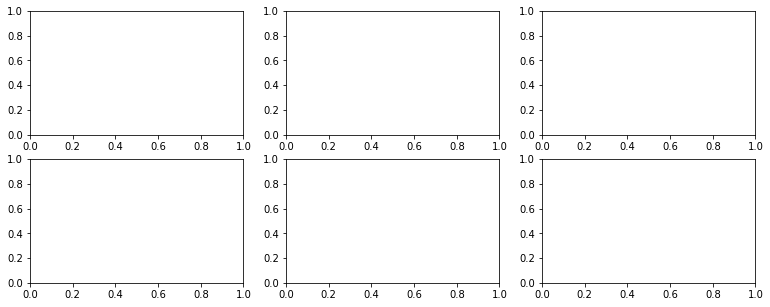

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(13, 5))

In [ ]:
axs[0]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 511 samples in 0.002s...
[t-SNE] Computed neighbors for 511 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 511 / 511
[t-SNE] Mean sigma: 32.977381
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.074375
[t-SNE] KL divergence after 1000 iterations: 0.255903


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 511 samples in 0.000s...
[t-SNE] Computed neighbors for 511 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 511 / 511
[t-SNE] Mean sigma: 38.060200
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.250874
[t-SNE] KL divergence after 1000 iterations: 0.402461


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 511 samples in 0.000s...
[t-SNE] Computed neighbors for 511 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 511 / 511
[t-SNE] Mean sigma: 45.568567
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.914810
[t-SNE] KL divergence after 1000 iterations: 0.539357


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 511 samples in 0.000s...
[t-SNE] Computed neighbors for 511 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 511 / 511
[t-SNE] Mean sigma: 58.987638
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.972649
[t-SNE] KL divergence after 1000 iterations: 0.699250


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 511 samples in 0.000s...
[t-SNE] Computed neighbors for 511 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 511 / 511
[t-SNE] Mean sigma: 75.982192
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.285088
[t-SNE] KL divergence after 1000 iterations: 1.000353


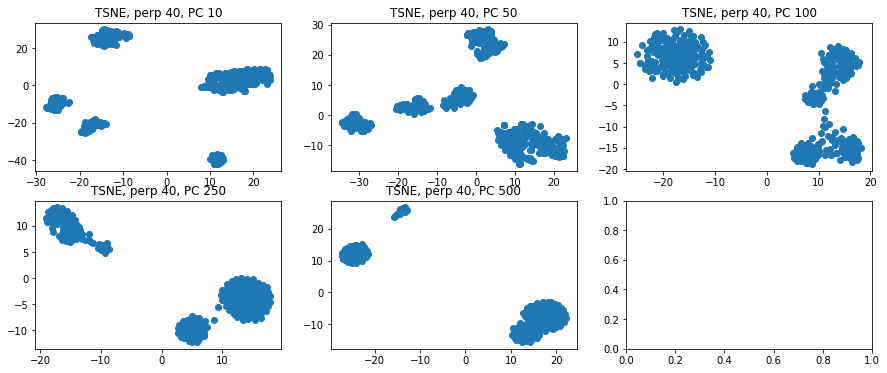

In [ ]:
pc_list = [10, 50, 100, 250, 500]
for idx, pc in enumerate(pc_list):
    pca = PCA(pc)
    z_log = pca.fit_transform(X_log)
    tsne = TSNE(n_components=2,verbose=1,perplexity=40)
    z_tsne = tsne.fit_transform(z_log)
    if idx < 3:
        axs[0][idx].scatter(z_tsne[:,0],z_tsne[:,1])
        axs[0][idx].set_title("TSNE, perp 40, PC {}".format(pc),size=12)
    else:
        axs[1][idx-3].scatter(z_tsne[:,0],z_tsne[:,1])
        axs[1][idx-3].set_title("TSNE, perp 40, PC {}".format(pc),size=12)

fig

In [ ]:
tar = tarfile.open('release_gene_analysis_data.tar.gz', 'r:gz')
member = tar.getmember('data/p2_unsupervised/X.npy')
f = tar.extractfile(member)
X = np.load(io.BytesIO(f.read()))

tar.close()

In [ ]:
# log transform
X_log = np.log2(X + 1)
print(X_log.shape)
np.max(X_log[:,0])

(2169, 45768)


5.972169178513185

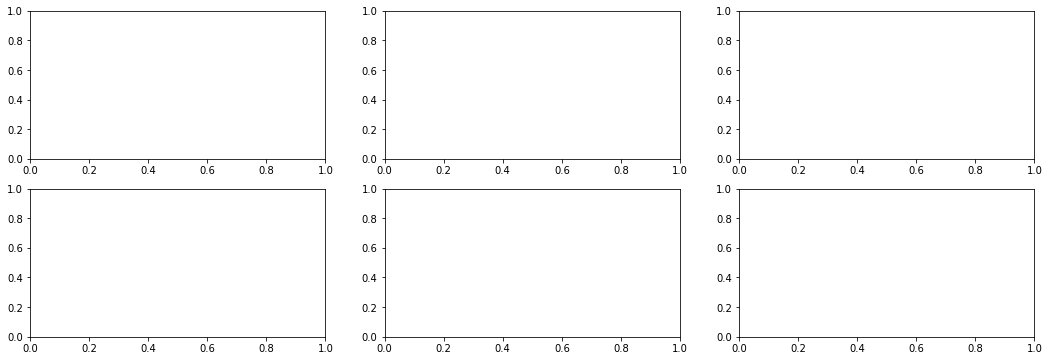

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 6))

C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.005s...
[t-SNE] Computed neighbors for 2169 samples in 0.158s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 41.358918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.412064
[t-SNE] KL divergence after 1000 iterations: 0.887918
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.005s...
[t-SNE] Computed neighbors for 2169 samples in 0.117s...


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 41.358918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.654190
[t-SNE] KL divergence after 1000 iterations: 0.864707
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.004s...
[t-SNE] Computed neighbors for 2169 samples in 0.118s...


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 41.358918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.198296
[t-SNE] KL divergence after 1000 iterations: 0.862669
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.005s...
[t-SNE] Computed neighbors for 2169 samples in 0.108s...


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 41.358918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.215210
[t-SNE] KL divergence after 1000 iterations: 0.859480
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.005s...
[t-SNE] Computed neighbors for 2169 samples in 0.110s...


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 41.358918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.422997
[t-SNE] KL divergence after 1000 iterations: 0.857303
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.005s...
[t-SNE] Computed neighbors for 2169 samples in 0.116s...


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 41.358918
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.022133
[t-SNE] KL divergence after 1000 iterations: 0.862225


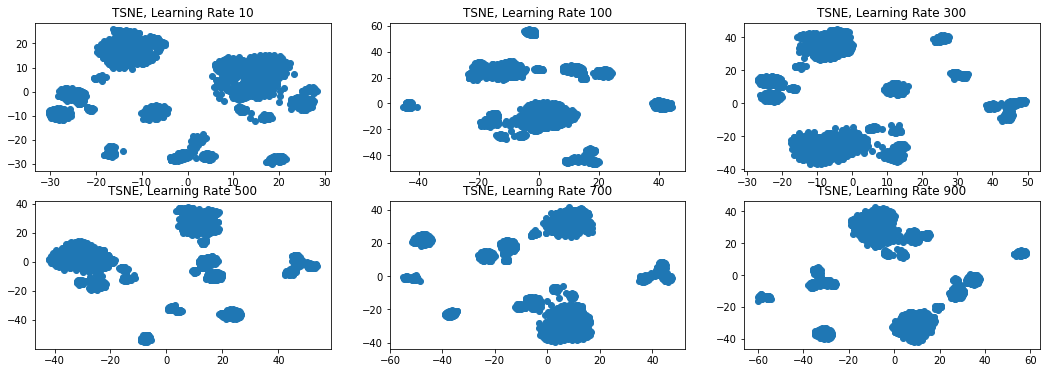

In [ ]:
pca = PCA(500)
z_log = pca.fit_transform(X_log)

lr_list = [10, 100, 300, 500, 700, 900]
for idx, lr in enumerate(lr_list):
    tsne = TSNE(n_components=2,verbose=1,perplexity=40, learning_rate=lr)
    z_tsne = tsne.fit_transform(z_log)
    if idx < 3:
        axs[0][idx].scatter(z_tsne[:,0],z_tsne[:,1])
        axs[0][idx].set_title("TSNE, Learning Rate {}".format(lr),size=12)
    else:
        axs[1][idx-3].scatter(z_tsne[:,0],z_tsne[:,1])
        axs[1][idx-3].set_title("TSNE, Learning Rate {}".format(lr),size=12)

fig

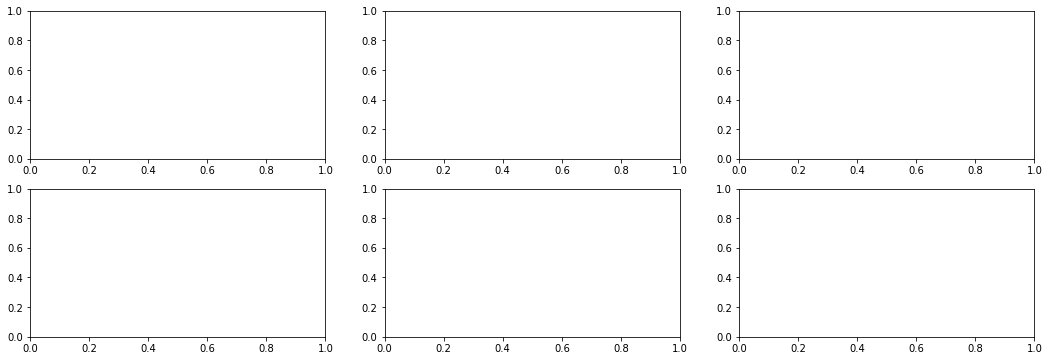

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 6))

C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.007s...
[t-SNE] Computed neighbors for 2169 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 23.049149
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.754326
[t-SNE] KL divergence after 1000 iterations: 1.570548
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.005s...
[t-SNE] Computed neighbors for 2169 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 36.580907
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.115913
[t-SNE] KL divergence after 1000 iterations: 1.041108
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.005s...
[t-SNE] Computed neighbors for 2169 samples in 0.129s...


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 44.026267
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.823597
[t-SNE] KL divergence after 1000 iterations: 0.791546
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.005s...


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2169 samples in 0.212s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 53.002335
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.673405
[t-SNE] KL divergence after 1000 iterations: 0.583504
[t-SNE] Computing 751 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.005s...


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2169 samples in 0.328s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 64.813217
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.202763
[t-SNE] KL divergence after 1000 iterations: 0.411767
[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.005s...


C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2169 samples in 0.414s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 76.213626
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.269707
[t-SNE] KL divergence after 1000 iterations: 0.252773


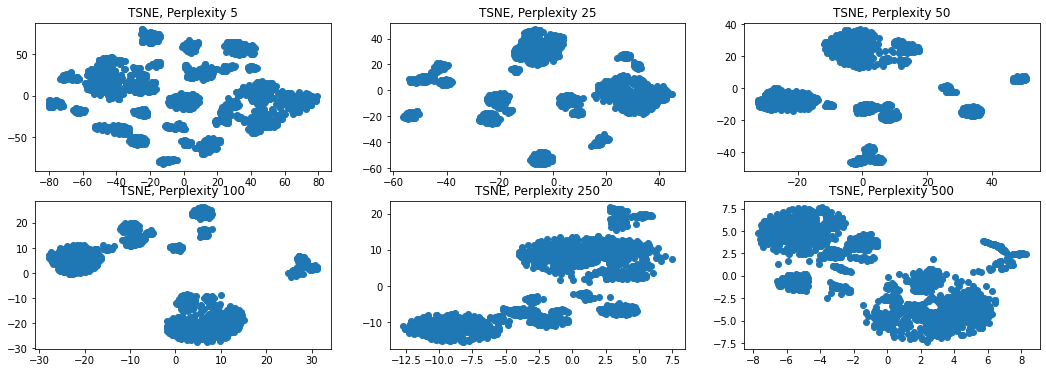

In [ ]:
pca = PCA(500)
z_log = pca.fit_transform(X_log)

perp_list = [5, 25, 50, 100, 250, 500]
for idx, perp in enumerate(perp_list):
    tsne = TSNE(n_components=2,verbose=1,perplexity=perp)
    z_tsne = tsne.fit_transform(z_log)
    if idx < 3:
        axs[0][idx].scatter(z_tsne[:,0],z_tsne[:,1])
        axs[0][idx].set_title("TSNE, Perplexity {}".format(perp),size=12)
    else:
        axs[1][idx-3].scatter(z_tsne[:,0],z_tsne[:,1])
        axs[1][idx-3].set_title("TSNE, Perplexity {}".format(perp),size=12)

fig

(511, 500)

In [ ]:
tar = tarfile.open('release_gene_analysis_data.tar.gz', 'r:gz')
member = tar.getmember('data/p1/X.npy')
f = tar.extractfile(member)
X = np.load(io.BytesIO(f.read()))

tar.close()

In [ ]:
X[:100,:].shape

(100, 45768)

In [ ]:
# log transform
X_log = np.log2(X[:50,:] + 1)
print(X_log.shape)
np.max(X_log[:,0])

(50, 45768)


0.0

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
# Perform hierarchical clustering
Z = linkage(X_log, 'ward')

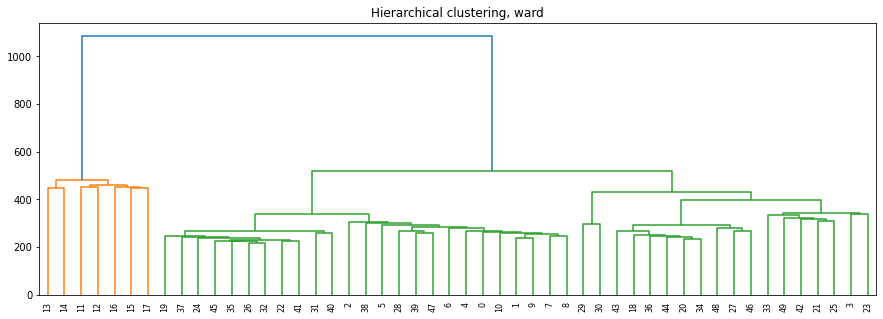

In [ ]:
fig = plt.figure(figsize=(15, 5))
plt.title('Hierarchical clustering, ward')
dn = dendrogram(Z)

In [ ]:
# Perform hierarchical clustering
Z = linkage(X_log, 'single')

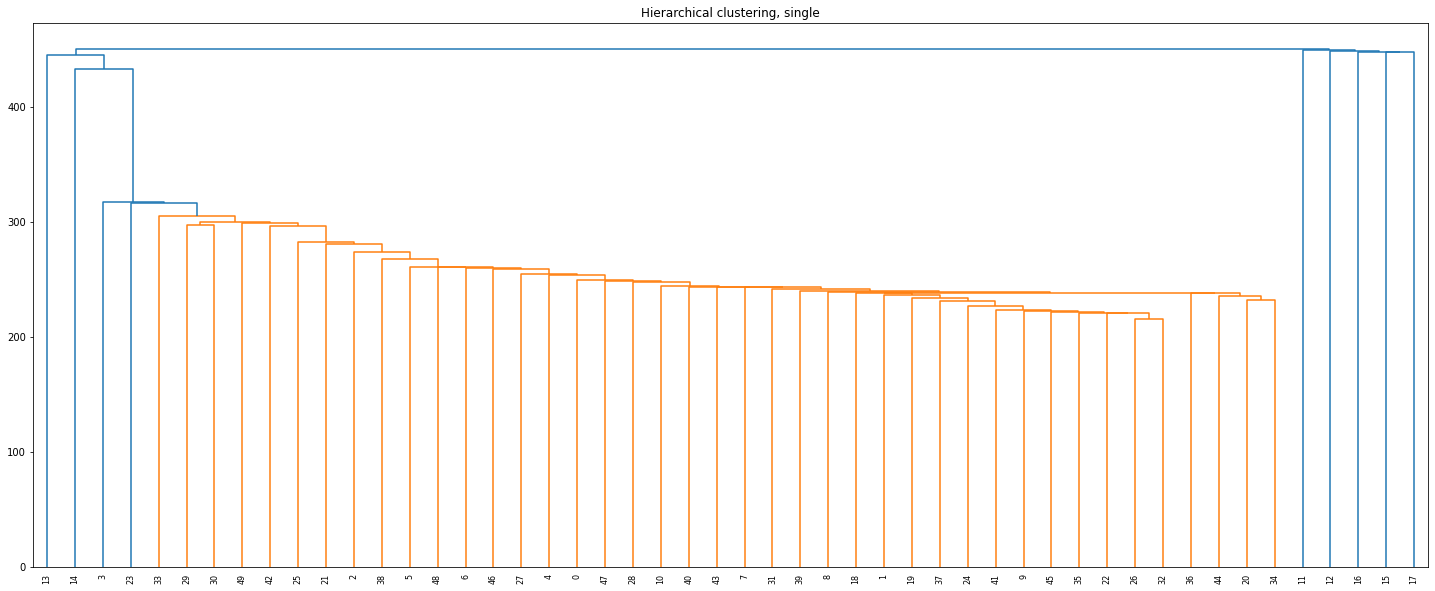

In [ ]:
fig = plt.figure(figsize=(25, 10))
plt.title('Hierarchical clustering, single')
dn = dendrogram(Z)

In [ ]:
z_log.shape

(50, 50)

In [ ]:
tar = tarfile.open('release_gene_analysis_data.tar.gz', 'r:gz')
member = tar.getmember('data/p2_evaluation/X_train.npy')
f = tar.extractfile(member)
X_train = np.load(io.BytesIO(f.read()))

member = tar.getmember('data/p2_evaluation/X_test.npy')
f = tar.extractfile(member)
X_test = np.load(io.BytesIO(f.read()))

member = tar.getmember('data/p2_evaluation/y_train.npy')
f = tar.extractfile(member)
y_train = np.load(io.BytesIO(f.read()))

member = tar.getmember('data/p2_evaluation/y_test.npy')
f = tar.extractfile(member)
y_test = np.load(io.BytesIO(f.read()))

tar.close()

In [ ]:
X_train.shape
# log transform
X_train_mod = np.log2(X_train + 1)
X_test_mod = np.log2(X_test + 1)

In [ ]:
# log transform
limit = 100
X_train_mod = X_train_mod[:limit,:]
X_test_mod = X_test_mod[:limit,:]
y_train_mod = y_train[:limit]
y_test_mod = y_test[:limit]

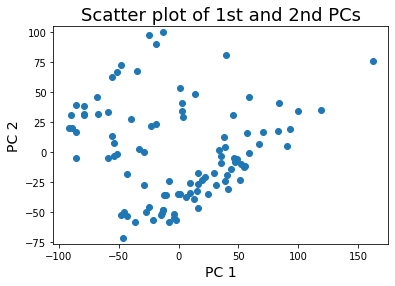

In [ ]:
z_log, _ = apply_pca(X_train_mod)
scatter_plot_first2_pc(z_log, "Scatter plot of 1st and 2nd PCs", "PC 1", "PC 2")

In [ ]:
log_reg = LogisticRegressionCV(cv=5,Cs=[0.01],max_iter=20,penalty="l1",solver="liblinear",multi_class="ovr")
log_reg.fit(X_train_mod,y_train_mod)

LogisticRegressionCV(Cs=[0.01], cv=5, max_iter=20, multi_class='ovr',
                     penalty='l1', solver='liblinear')

In [ ]:
log_reg.score(X_test_mod,y_test_mod)

0.86

In [ ]:
coeficients = np.sum(np.abs(log_reg.coef_),axis=0)

In [ ]:
top = 100
best_features_l1 = set(np.argsort(-coeficients)[:top])
best_features_l1

{4688,
 30416,
 30417,
 30418,
 30419,
 30420,
 30421,
 30422,
 30479,
 30481,
 30482,
 30483,
 30484,
 30485,
 30486,
 30487,
 30488,
 30489,
 30490,
 30491,
 30492,
 30493,
 30494,
 30495,
 30496,
 30497,
 30498,
 30499,
 30500,
 30501,
 30502,
 30503,
 30504,
 30505,
 30506,
 30507,
 30508,
 30509,
 30510,
 30511,
 30512,
 30513,
 30514,
 30515,
 30516,
 30517,
 30518,
 30519,
 30520,
 30521,
 30522,
 30523,
 30524,
 30525,
 30526,
 30527,
 30528,
 30529,
 30530,
 30531,
 30532,
 30533,
 30534,
 30535,
 30536,
 30537,
 30538,
 30539,
 30540,
 30541,
 30542,
 30543,
 30544,
 30545,
 30546,
 30547,
 30548,
 30549,
 30550,
 30551,
 30552,
 30553,
 30554,
 30555,
 30556,
 30557,
 30558,
 30559,
 30560,
 30561,
 30562,
 30563,
 30564,
 31421,
 34456,
 34844,
 38860,
 39709,
 40045,
 45653}

In [ ]:
log_reg = LogisticRegressionCV(cv=5,Cs=[0.01],max_iter=20,penalty="l2",solver="liblinear",multi_class="ovr")
log_reg.fit(X_train_mod,y_train_mod)

LogisticRegressionCV(Cs=[0.01], cv=5, max_iter=20, multi_class='ovr',
                     solver='liblinear')

In [ ]:
log_reg.score(X_test_mod,y_test_mod)

0.96

In [ ]:
coeficients = np.sum(np.abs(log_reg.coef_),axis=0)

In [ ]:
top = 100
best_features_l2 = set(np.argsort(-coeficients)[:top])
best_features_l2

{2056,
 2795,
 2999,
 4386,
 4688,
 4832,
 5252,
 5523,
 5563,
 5597,
 5610,
 5641,
 5747,
 6626,
 6724,
 6890,
 6935,
 6951,
 6970,
 7394,
 7540,
 7897,
 8325,
 8427,
 8500,
 8735,
 9718,
 13861,
 23600,
 23640,
 23642,
 23659,
 23906,
 24426,
 25295,
 25365,
 25448,
 25536,
 25653,
 25693,
 25827,
 26116,
 31421,
 31662,
 31711,
 31889,
 32447,
 33837,
 34456,
 34467,
 34550,
 34558,
 34798,
 34844,
 34946,
 34955,
 34999,
 35059,
 36855,
 36884,
 36892,
 37214,
 37436,
 38036,
 38243,
 38318,
 38332,
 38336,
 38402,
 38605,
 38729,
 38860,
 39151,
 39709,
 39723,
 39948,
 40045,
 40056,
 40519,
 40520,
 40770,
 40827,
 41222,
 41783,
 41846,
 42206,
 42302,
 42359,
 42406,
 42507,
 42585,
 42792,
 42860,
 42918,
 42927,
 44789,
 44795,
 44937,
 45329,
 45653}

In [ ]:
log_reg = LogisticRegressionCV(cv=5,Cs=[0.01],max_iter=20,penalty="elasticnet",solver="saga",multi_class="ovr", l1_ratios=[0.5])
log_reg.fit(X_train_mod,y_train_mod)

C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LuisGonzalez\Virtual envs\Jupiter\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LuisGonzale

LogisticRegressionCV(Cs=[0.01], cv=5, l1_ratios=[0.5], max_iter=20,
                     multi_class='ovr', penalty='elasticnet', solver='saga')

In [ ]:
log_reg.score(X_test_mod,y_test_mod)

0.81

In [ ]:
coeficients = np.sum(np.abs(log_reg.coef_),axis=0)

In [ ]:
top = 100
best_features_elasticnet = set(np.argsort(-coeficients)[:top])
best_features_elasticnet

{2603,
 2795,
 3902,
 4331,
 4369,
 4386,
 4688,
 5250,
 5252,
 5523,
 5562,
 5563,
 5597,
 6626,
 6724,
 6890,
 6935,
 6970,
 7223,
 7394,
 7897,
 8213,
 8325,
 8427,
 8500,
 8567,
 8574,
 23640,
 23642,
 23659,
 23675,
 23906,
 25448,
 25536,
 25653,
 25693,
 25827,
 26116,
 30006,
 31421,
 31711,
 31889,
 32023,
 33837,
 34406,
 34456,
 34467,
 34550,
 34558,
 34844,
 34846,
 34946,
 34955,
 34999,
 35059,
 36788,
 36855,
 36883,
 36884,
 36887,
 36892,
 36893,
 36986,
 38036,
 38243,
 38332,
 38336,
 38402,
 38729,
 38860,
 39164,
 39709,
 39948,
 40045,
 40056,
 40166,
 40519,
 40520,
 40767,
 40827,
 40962,
 41222,
 42206,
 42359,
 42360,
 42406,
 42507,
 42585,
 42610,
 42749,
 42860,
 42918,
 43443,
 43475,
 44012,
 44772,
 44795,
 44937,
 45329,
 45653}

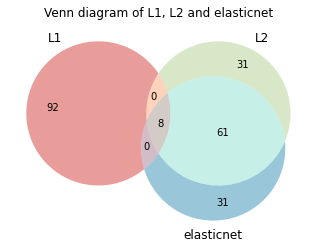

In [ ]:
from matplotlib_venn import venn2, venn3

# Create Venn diagram
venn3([best_features_l1, best_features_l2, best_features_elasticnet], set_labels=('L1', 'L2', 'elasticnet'))

# Add title and show plot
plt.title('Venn diagram of L1, L2 and elasticnet')
plt.show()